In [1]:
import numpy as np
import matplotlib.pyplot as plt
import flopy
from flopy.plot import styles

In [2]:
import matplotlib.pyplot as plt

In [3]:
import os

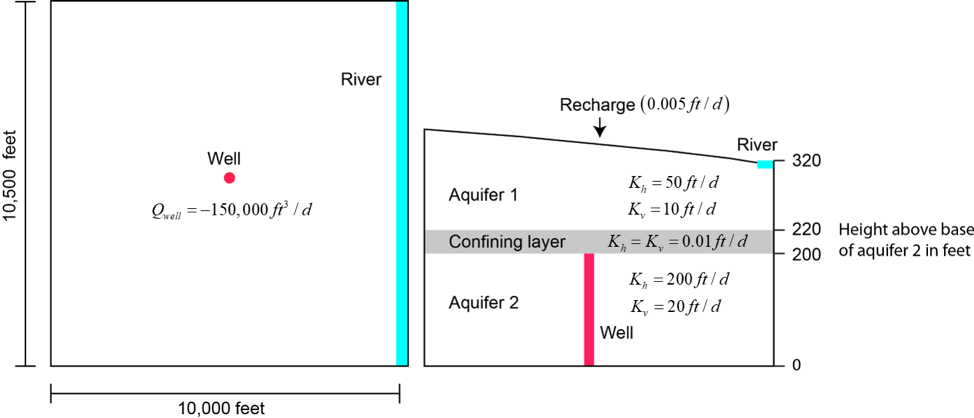

### Building and post-processing a MODFLOW 6 model

A MODFLOW 6 model will be developed of the domain shown above. This model simulation is based on example 1 in [Pollock, D.W., 2016, User guide for MODPATH Version 7—A particle-tracking model for MODFLOW: U.S. Geological Survey Open-File Report 2016–1086, 35 p., http://dx.doi.org/10.3133/ofr20161086](https://doi.org/10.3133/ofr20161086).

The model domain will be discretized into 3 layers, 21 rows, and 20 columns. A constant value of 500. will `delr` and `delc`. The top of the model should be set to 400 and the bottom of the three layers should be set to 220, 200, and 0. The model has one steady-state stress period. 

Create a simulation object, a time discretization object, and a iterative model solution object using `flopy.mf6.MFSimulation()`, `flopy.mf6.ModflowTdis()`, and `flopy.mf6.ModflowIms()`, respectively. Use default values for all iterative model solution variables.

Before creating the simulation object you should define the simulation workspace (`sim_ws`) where the model files are, the simulation name (`name`), and the name and path of the model executable (`exe_name`).  The `sim_ws` should be set to `'data/ex01b'`, `name` should be set to `ex01b`, and `exe_name` should be set to `bin/mf6`.

In [4]:
ws = "./data/mumodel_mf6"
name = "mumodel"
exe_name = "mf6"

In [38]:
sim = flopy.mf6.MFSimulation.load(sim_ws=ws)
m = sim.get_model(name)
mg = m.modelgrid

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package sto...
    loading package oc...
    loading package wel...
    loading package rch...
    loading package chd...
  loading solution package mumodel...


In [9]:
m.model_ws

'C:\\Users\\knigh\\Documents\\coding\\python-for-hydrology_mu\\notebooks\\part1_flopy\\data\\mumodel_mf6\\'

In [10]:
sim.run_simulation()

FloPy is using the following executable to run the model: ..\..\..\..\..\..\..\..\..\A\envs\pyclass\Scripts\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.4.2 06/28/2023

   MODFLOW 6 compiled Jul 05 2023 20:31:54 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither

(True, [])

In [11]:
hds = m.output.head()

(array([   25.,  3492.,    15.,  3485.,   383.,  3221.,  3510.,  3750.,
         6437., 12159.]),
 array([ 998.68306459,  999.38324406, 1000.08342353, 1000.783603  ,
        1001.48378247, 1002.18396194, 1002.88414141, 1003.58432088,
        1004.28450035, 1004.98467982, 1005.68485929]),
 <BarContainer object of 10 artists>)

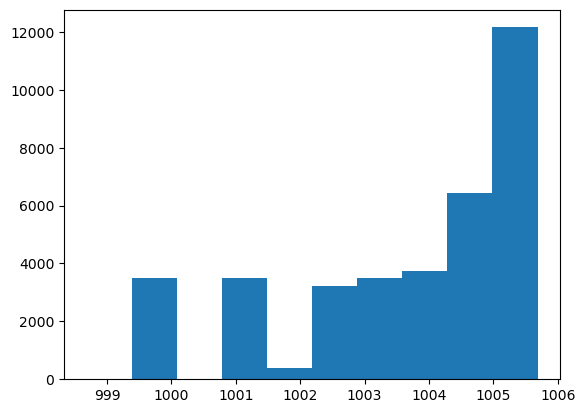

In [12]:
plt.hist(hds.get_alldata().ravel())

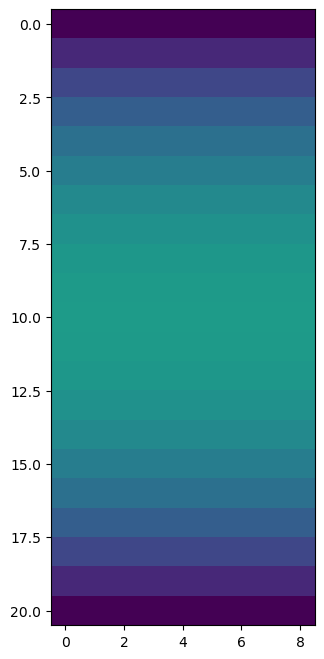

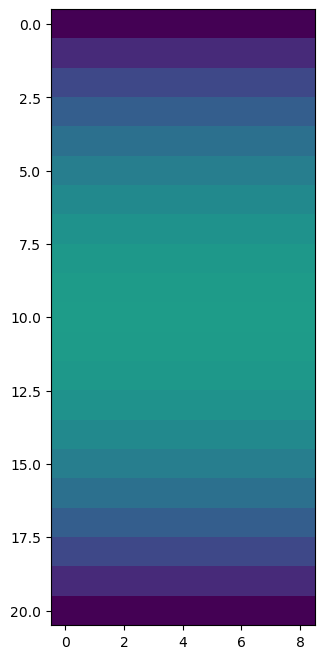

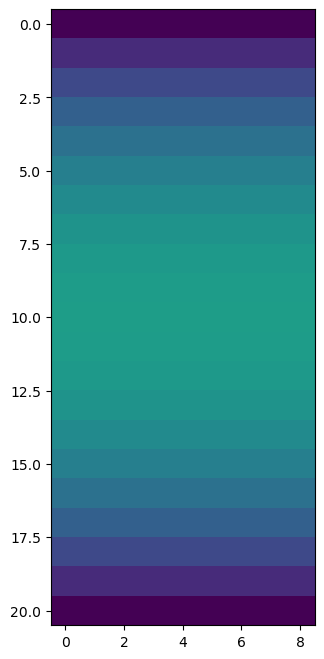

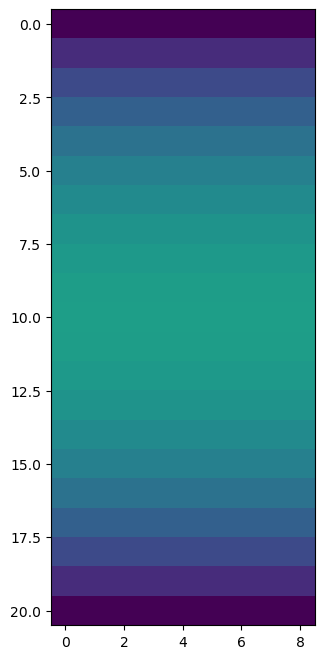

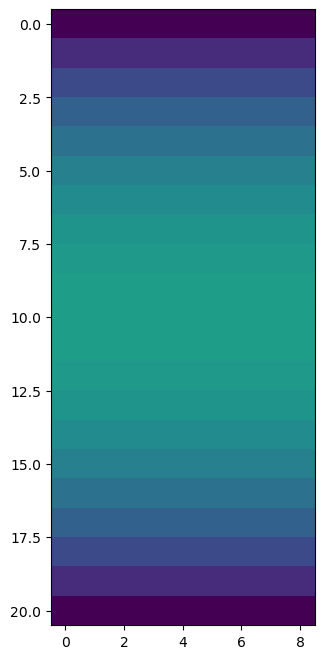

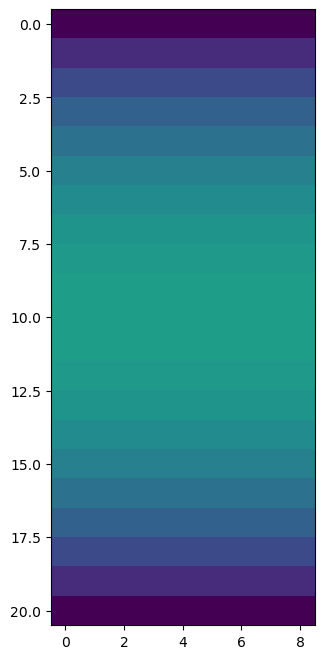

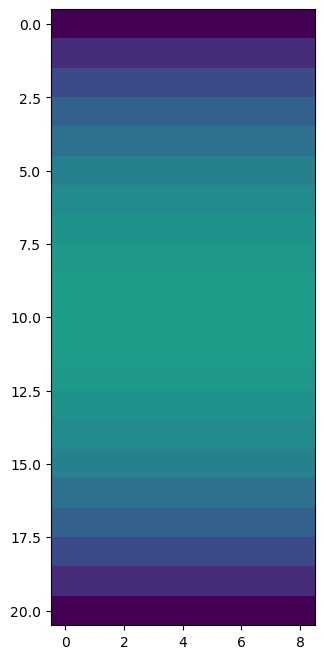

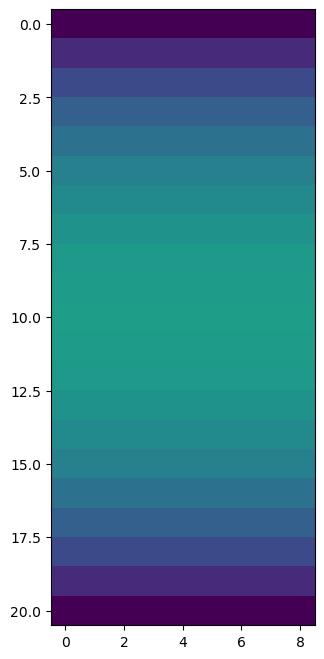

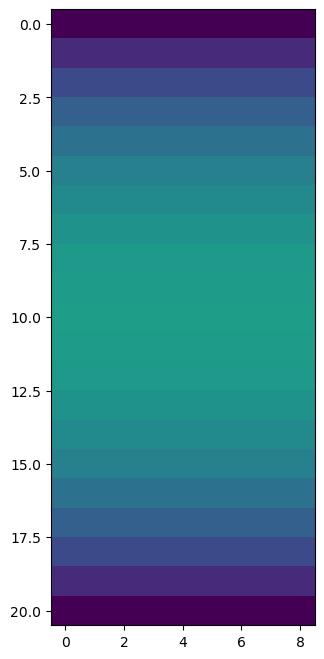

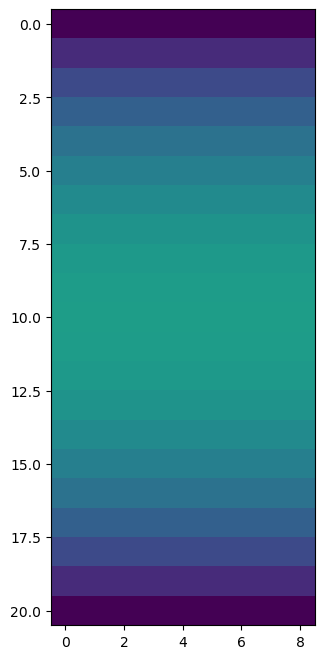

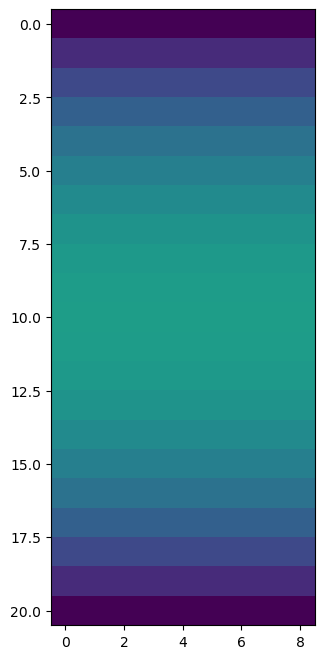

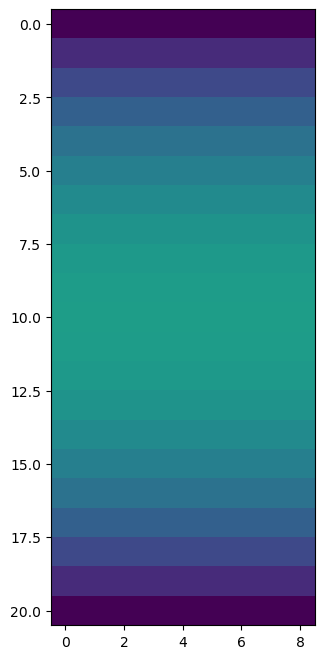

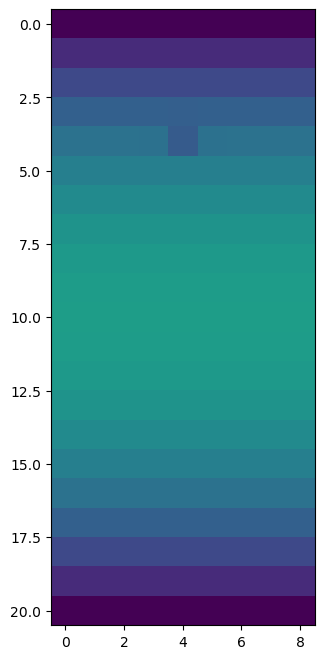

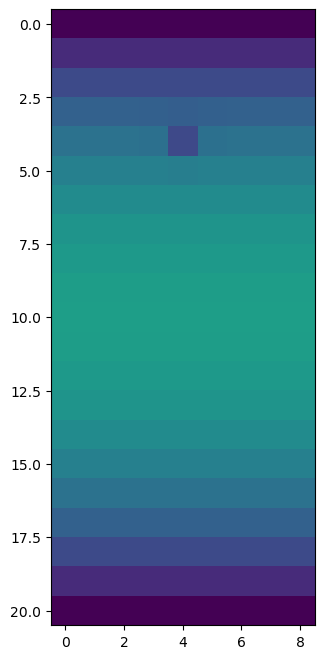

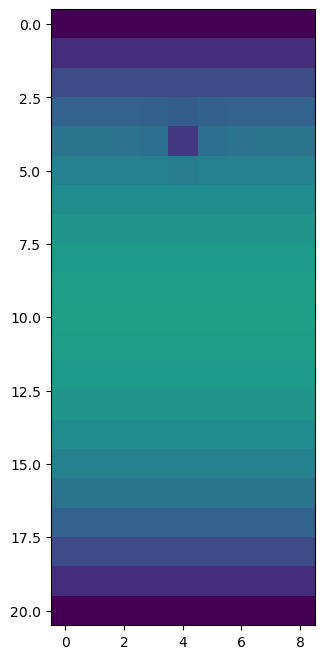

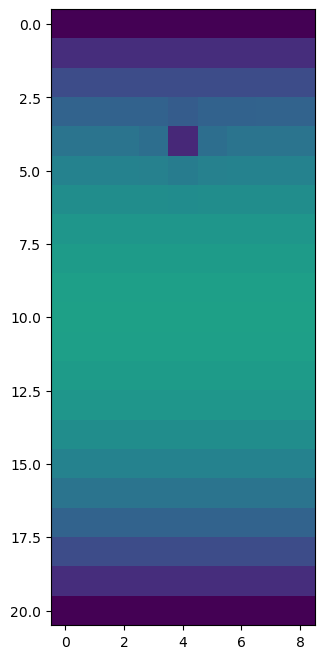

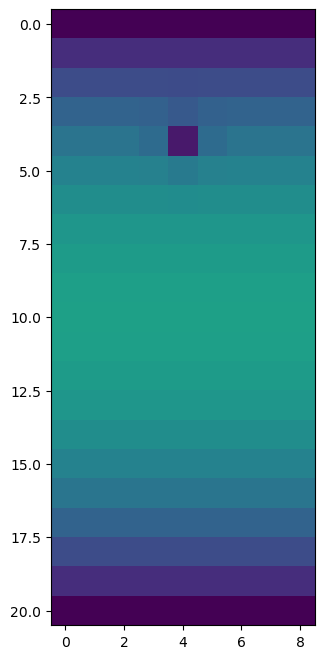

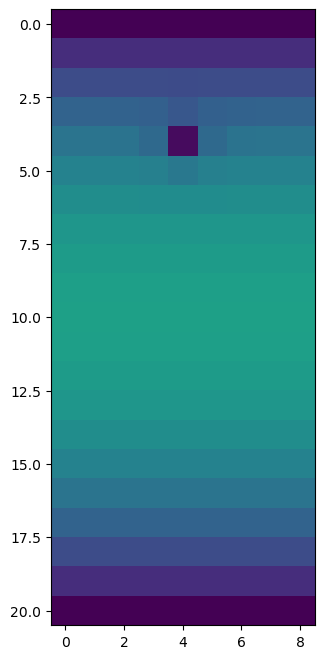

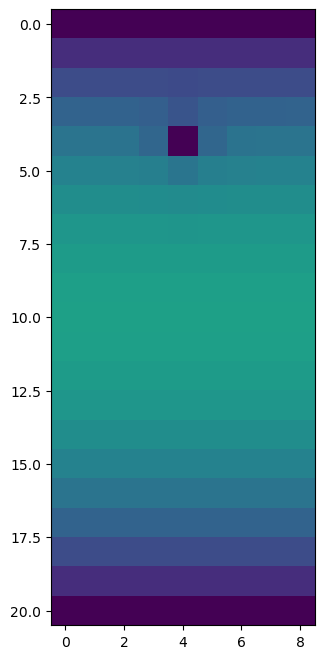

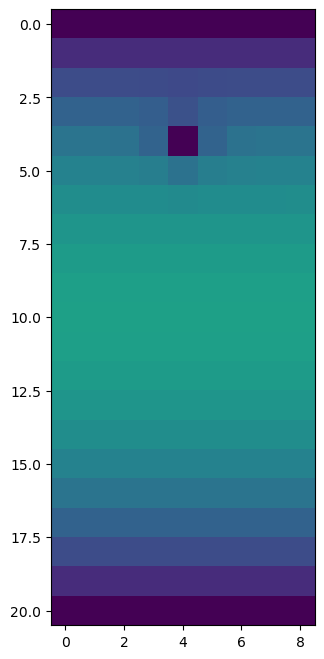

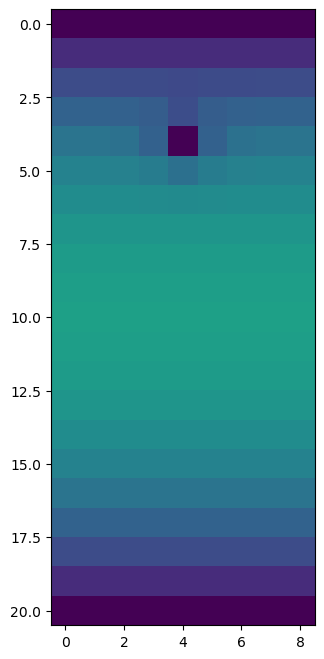

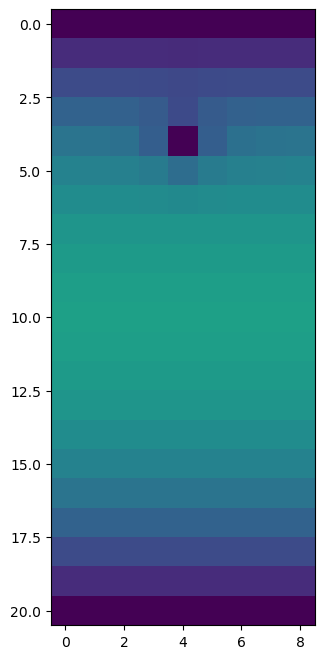

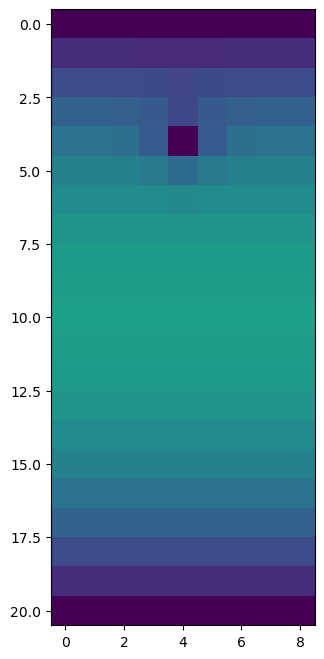

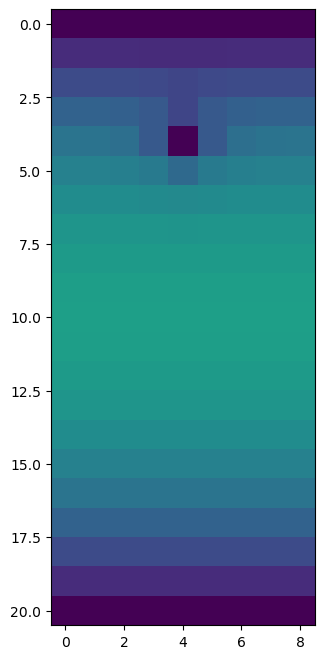

In [13]:
for i, (ts, sp) in enumerate(hds.get_kstpkper()):
    if ts == 7:
        f, ax = plt.subplots(1,1,figsize=(4,8), dpi=100)
        ax.imshow(hds.get_data(kstpkper=(ts, sp))[0], vmin=1000, vmax=1010)

In [14]:
cbc = m.output.budget()

In [15]:
wel = cbc.get_data(text='wel', full3D=True)[-1].sum(axis=0)

In [16]:
rch = cbc.get_data(text='rch', full3D=True)

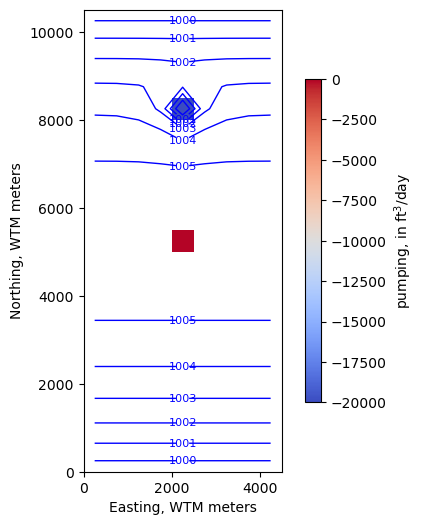

In [17]:
levels=np.arange(1000, 1010, 1)
wt = hds.get_data()
fig, ax = plt.subplots(figsize=(6, 6))
pmv = flopy.plot.PlotMapView(m, ax=ax)
ctr = pmv.contour_array(wt, levels=levels, 
                        linewidths=1, colors='b')
labels = pmv.ax.clabel(ctr, inline=True, fontsize=8, inline_spacing=1)
vmin, vmax = -20000, 0
im = pmv.plot_array(wel, cmap='coolwarm', vmin=vmin, vmax=vmax)
cb = fig.colorbar(im, shrink=0.7, label='pumping, in ft$^3$/day')
ax.set_ylabel("Northing, WTM meters")
ax.set_xlabel("Easting, WTM meters")
ax.set_aspect(1)

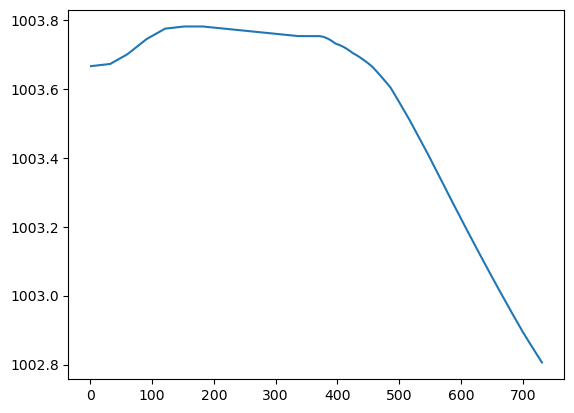

In [18]:
ts = hds.get_ts((0, 4, 3))
plt.plot(ts[:, 0], ts[:, 1])

In [19]:
m.npf.k.data

array([[[50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [50., 50., 50., 50., 50., 50., 50., 50., 50.],
        [5

In [20]:
m.npf.k = 25.

In [21]:
m.npf.write()

In [22]:
sim.run_simulation(silent=True)

(True, [])

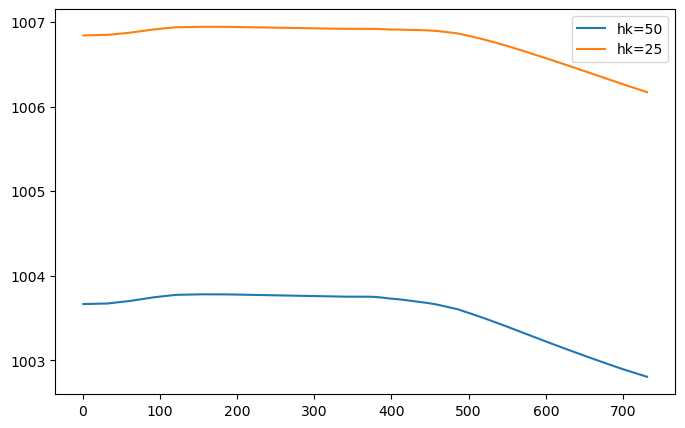

In [23]:
hds = m.output.head()
ts1 = hds.get_ts((0, 4, 3))
f, ax = plt.subplots(1,1,figsize=(8,5), dpi=100)
ax.plot(ts[:, 0], ts[:, 1], label="hk=50")
ax.plot(ts1[:, 0], ts1[:, 1], label="hk=25")
ax.legend(loc=1)
ax.set_ylim([1000, 1010])

In [24]:
hdsdict = {}
for kval in [25., 32., 39., 45., 50., 60., 70., 80., 100.]:
    m.npf.k = kval
    m.npf.write()
    sim.run_simulation(silent=True)
    hds = m.output.head()
    ts = hds.get_ts((0, 4, 3))
    hdsdict["hk{0}".format(kval)] = ts[:, 1]

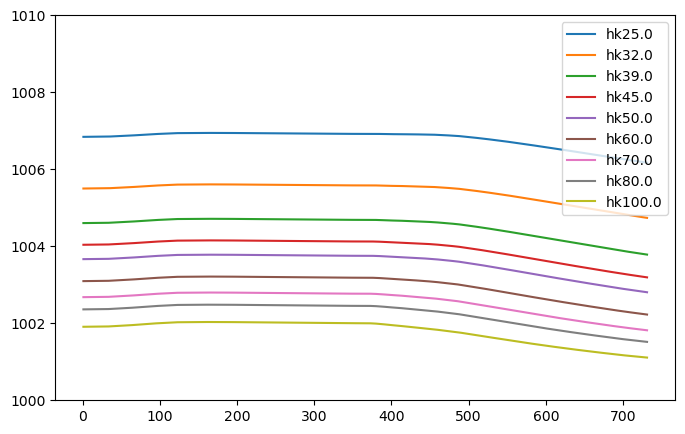

In [30]:
f, ax = plt.subplots(1,1,figsize=(8,5), dpi=100)
for hkval, ts in hdsdict.items():
    ax.plot(hds.get_times(), ts, label=hkval)
    ax.legend(loc=1)
    ax.set_ylim([1000, 1010])

In [26]:
m.npf.k = 50.

In [27]:
m.npf.write()

## recharge

In [42]:
spd = m.rch.recharge.get_data()

In [58]:
r = m.rch.recharge

In [65]:
spdi = {}
for k, v in spd.items():
    if not v is None:
        spdi[k] = v * 0.5

In [66]:
r.set_data(spdi)

In [69]:
hdsdict1 = {}
for rfact in [.5, .62, .75, .87, 1., 1.25, 1.5, 1.75, 2.0]:
    spdi = {}
    for k, v in spd.items():
        if not v is None:
            spdi[k] = v * rfact
    m.rch.recharge.set_data(spdi)
    m.rch.write()
    sim.run_simulation(silent=True)
    hds = m.output.head()
    ts = hds.get_ts((0, 4, 3))
    hdsdict1["rch{0}".format(rfact)] = ts[:, 1]

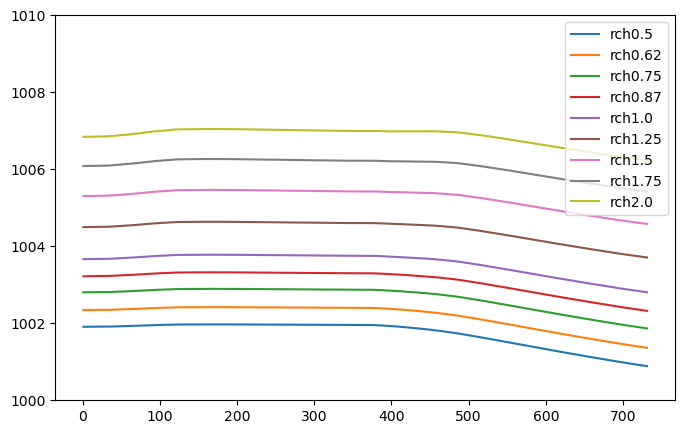

In [70]:
f, ax = plt.subplots(1,1,figsize=(8,5), dpi=100)
for rchval, ts in hdsdict1.items():
    ax.plot(hds.get_times(), ts, label=rchval)
    ax.legend(loc=1)
    ax.set_ylim([1000, 1010])

In [ ]:
# create simulation

# create tdis package

# create iterative model solution


Create the gwf model object using `flopy.mf6.ModflowGwf()`. 

Create the discretization package using `flopy.mf6.ModflowGwfdis()`.

In [ ]:
# dis data


`flopy.plot.PlotMapView()` and `flopy.plot.PlotCrossSection()` can be used to confirm that the discretization is correctly defined.

#### Create the initial conditions (IC) package

Create the discretization package using `flopy.mf6.ModflowGwfic()` and set the initial head (`strt`) to 320. Default values can be used for the rest of the initial conditions package input.

#### Create the node property flow (NPF) package

The hydraulic properties for the model are defined in the image above. The first layer should be convertible (unconfined) and the remaining two layers will be non-convertible so `icelltype` should be `[1, 0, 0]`. The variable `save_specific_discharge` should be set to `True` so that specific discharge data are saved to the cell-by-cell file and can be used to plot discharge.

In [ ]:
# create kh, kv, and icelltype


#### Create the recharge package

The recharge rate is defined in the image above. Use the `flopy.mf6.ModflowGwfrcha()` method to specify recharge data using arrays.

#### Create the well package

The well is located in layer 3, row 11, column 10. The pumping rate is defined in the image above.

#### Create the river package

The river is located in layer 1 and column 20 in every row in the model. The river stage stage and bottom are at 320 and 318, respectively; the river conductance is 1e5.

#### Build output control

Define the output control for the model using the `flopy.mf6.ModflowGwfoc` method to `[('HEAD', 'ALL'), ('BUDGET', 'ALL')]` to save the head and flow for the model. Because we haven't set `SAVE_FLOWS` to `True` in all of the  packages we can set `.name_file.save_flows` to `True` for the groundwater flow model (`gwf`) to save flows for all packages that can save flows. Also the head (`head_filerecord`) and cell-by-cell flow (`budget_filerecord`) files should be set to `name+'.hds'` and `name+'.cbc'`, respectively.

#### Write the model files and run the model

#### Post-process the results

Load the heads and face flows from the hds and cbc files. The head file can be loaded with the `gwf.output.head()` method. The cell-by-cell file can be loaded with the `gwf.output.budget()` method.

The entries in the cell-by-cell file can be determined with the `.list_unique_records()` method on the cell budget file object.

Retrieve the `'DATA-SPDIS'` data type from the cell-by-cell file.

#### Plot the results

Plot the results using `flopy.plot.PlotMapView()`. The head results can be plotted using the `.plot_array()` method. The discharge results can be plotted using the `plot_specific_discharge()` method. Boundary conditions can be plotted using the `.plot_bc()` method.